# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


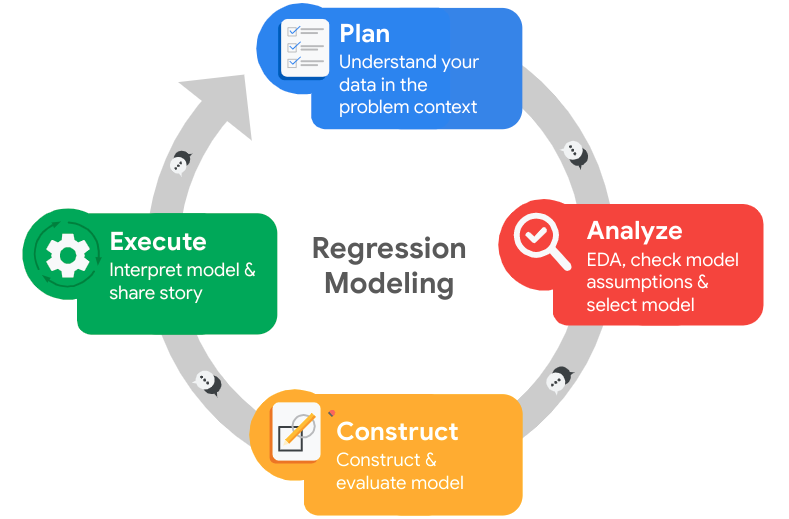

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).


#### Variables

**satisfaction_level:** Employee-reported job satisfaction level

**last_evaluation:** Score of employee's last performance review [0–1]

**number_project:** Number of projects employee contributes to

**average_monthly_hours:** Average number of hours employee worked per month

**time_spend_company:** How long the employee has been with the company (years)

**Work_accident:** Whether or not the employee experienced an accident while at work

**left:** Whether or not the employee left the company

**promotion_last_5years:** Whether or not the employee was promoted in the last 5 years

**Department:** The employee's department 

**salary:** The employee's salary (U.S. dollars)

### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
    * *The stakeholders for this project are the leadership team and the HR team.*
* What are you trying to solve or accomplish?
    * *Business Problem: There is a high turnover rate among Salifort Motors employees. Turnover is costly, and Salifort strives to create a corporate culture that supports employee success and professional development. Salifort wants to better understand the problem in order to develop a solution.*
    * *The goal is to build a model to predict whether an employee will leave the company based on HR survey data and develop insights on how to improve employee retention.*
* What are your initial observations when you explore the data?
    * *There are two categorical fields, `Department` and `salary` that will need to be dummy encoded.*
    * *There are no missing values, but a large number of duplicate values.*
* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    * *I am relying on course material from this certificate program, as well as Googling syntax for manipulating dataframes as well as tweaking plots.*
        * https://sparkbyexamples.com/pandas/pandas-get-column-names/
        * https://www.w3schools.com/python/pandas/ref_df_duplicated.asp
        * https://saturncloud.io/blog/5-easy-ways-to-get-pandas-dataframe-row-count/
* Do you have any ethical considerations in this stage?
    * *I have no ethical considerations at this stage. An employer looking to predict employee turnover is a typical HR activity, and the data is anonomized. However, it is important for the HR team to use these results in an ethical way.*




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [94]:
# Import packages
import numpy as np
import pandas as pd

# For getting the path of the data file
import os

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Assumption Testing
# For calculating Variance Inflation Factor (VIF) to test for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For Box Tidwell test
import statsmodels.api as sma
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

# For Logistic Regression model creation
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

# Packages for OLS, MLR, confusion matrix
import sklearn.metrics as metrics # For confusion matrix
import statsmodels.tools as tools

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

# Packages for Random Forest model
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score 

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_comma_sep.csv`.**

In [95]:
cwd = os.getcwd()
data = os.path.join(cwd, "HR_comma_sep.csv")

# Load dataset into a dataframe
df0 = pd.read_csv(data)

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [96]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [97]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [98]:
# Display all column names
df0.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales', 'salary'], dtype=object)

In [99]:
# Rename columns as needed
df0.columns = ['satisfaction', 'evaluation', 'projects',
               'avg_monthly_hours', 'tenure', 'work_accident',
               'exited', 'promotion', 'department', 'salary']


# Display all column names after the update
df0.columns.values


array(['satisfaction', 'evaluation', 'projects', 'avg_monthly_hours',
       'tenure', 'work_accident', 'exited', 'promotion', 'department',
       'salary'], dtype=object)

### Check missing values

Check for any missing values in the data.

In [100]:
# Check for missing values
df0.isna().sum()

satisfaction         0
evaluation           0
projects             0
avg_monthly_hours    0
tenure               0
work_accident        0
exited               0
promotion            0
department           0
salary               0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [101]:
# Check for duplicates
df0.duplicated().sum()

3008

In [102]:
# Inspect some rows containing duplicates as needed
mask = df0.duplicated()
df0[mask].head(10)

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


*There are 3008 duplicate rows that need to be removed.*

In [103]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


*Now we can verify that we have removed the correct number of rows.*

In [104]:
# Checking to make sure the appropriate number of rows was removed
print('Original row count: ', len(df0))
print('Duplicate row count:', df0.duplicated().sum())
print('Row count after removing duplicates: ', len(df1))
print('Duplicate rows removed: ', (len(df0) - len(df1)))


Original row count:  14999
Duplicate row count: 3008
Row count after removing duplicates:  11991
Duplicate rows removed:  3008


### Check outliers

Check for outliers in the data.

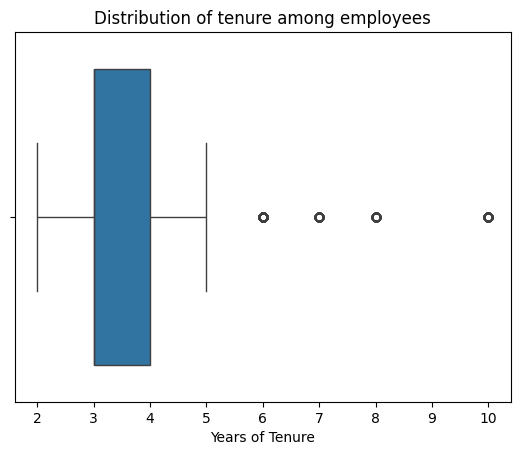

In [105]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

# Create boxplot
box = sns.boxplot(x=df1['tenure'])
g = plt.gca()
plt.xlabel('Years of Tenure')
plt.title('Distribution of tenure among employees');


In [106]:
# Determine the number of rows containing outliers

# Calculate 25th percentile of tenure
percentile25 = df1['tenure'].quantile(0.25)

# Calculate 75th percentile of tenure
percentile75 = df1['tenure'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Isolate outliers
mask = ((df1['tenure'] < lower_limit) | (upper_limit < df1['tenure']))
print("Number of outliers on tenure: ",len(df1[mask]))


Number of outliers on tenure:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* *Relationships between variables:*
    * *The highest correlations between independent variables are between `avg_monthly_hours` and `projects` as well as `avg_monthly_hours` and `evaluation`. We will look at the Variance Inflation Factor (VIF) to determine if there is an issue with multicollinearity that could be detrimental to a regression model.*
* *Distributions in the data:*
    * *`tenure` is skewed right, with some extreme outliers on the high end of the range.*
    * *Few employees have been involved in a `work_accident`.*
    * *Very few employees have been promoted within the last 5 years.*
    * *Most employees are in the low and medium range for `salary`, with few employees in the high range.*
    * *Sales is the largest `department`, followed by technical and support.*
* *Completing EDA before constructing a predictive model lets you explore and examine the data in order to make decisions about it. It helps you identify and decide how to handle missing and duplicate data. During EDA, you examine data types to determine whether variables need to be transformed, such as dummy encoding categorical variables. Examining variables during EDA will also help you determine what model or models are most appropriate, as well as whether the assumptions of your model have been met.*
* *I find myself referring to previous code covered in this course, plus some additional online resources*
    * *Visualization Resources:*
        * *https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram*
        * *https://www.geeksforgeeks.org/handling-categorical-data-in-python/*
        * *https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib*
        * *https://stackoverflow.com/questions/47074423/how-to-get-default-blue-colour-of-matplotlib-pyplot-scatter*
        * *https://python-charts.com/distribution/histogram-group-seaborn/*
        * *https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/*
        * *https://www.statology.org/seaborn-countplot-order/*
    * *Instructions on calculating Variance Inflation Factor (VIF):*
        * *https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b*
    * *Interpreting VIF:*
        * *https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/*
        * *https://www.investopedia.com/terms/v/variance-inflation-factor.asp*

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [107]:
# Get numbers of people who left vs. stayed
print('Class Balance:')
print()
print(df1['exited'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1['exited'].value_counts(normalize=True))

Class Balance:

exited
0    10000
1     1991
Name: count, dtype: int64

exited
0    0.833959
1    0.166041
Name: proportion, dtype: float64


*1991 employees left, which is 16.6% of the employees in the company.*

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Years of Tenure by Turnover Group')

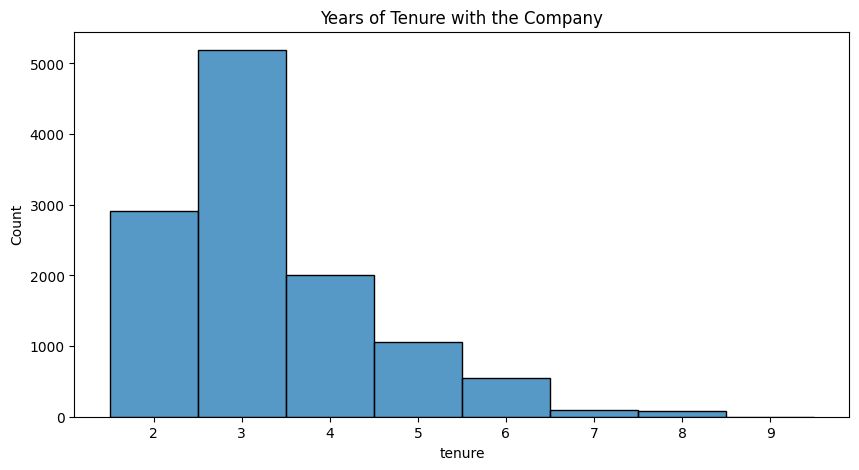

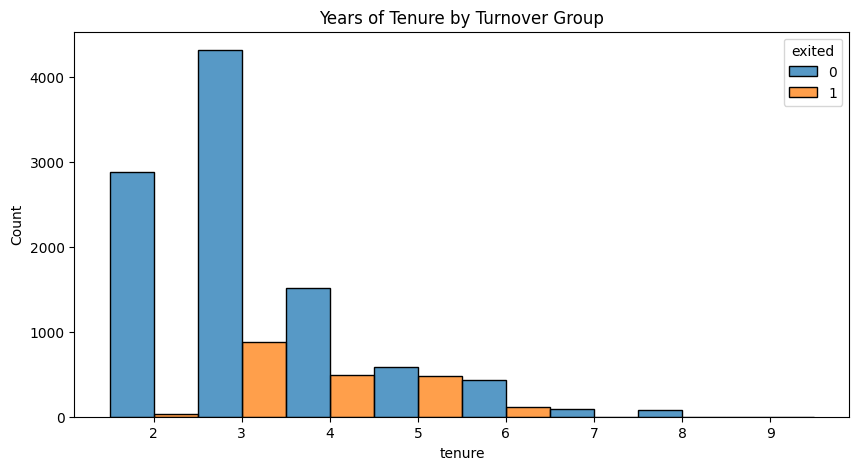

In [108]:
# Creating a histogram of years of tenure
plt.figure(figsize=(10,5))
sns.histplot(df1['tenure'], bins=np.arange(min(df1['tenure'])-0.5, max(df1['tenure'])+0.5))
plt.title('Years of Tenure with the Company');

# Creating a histogram of years of tenure by turnover group (exited vs. did not exit)
plt.figure(figsize=(10,5))
sns.histplot(x=df1['tenure'], hue=df1['exited'], bins=np.arange(min(df1['tenure'])-0.5, max(df1['tenure'])+0.5), 
             multiple='dodge')
plt.title('Years of Tenure by Turnover Group')

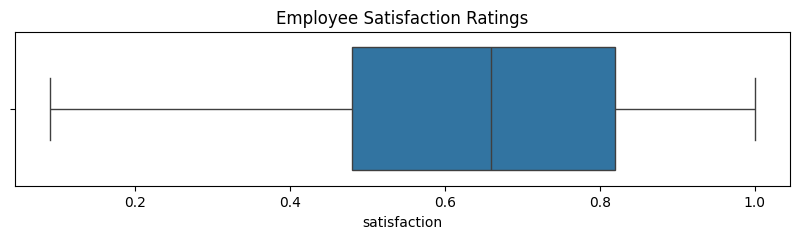

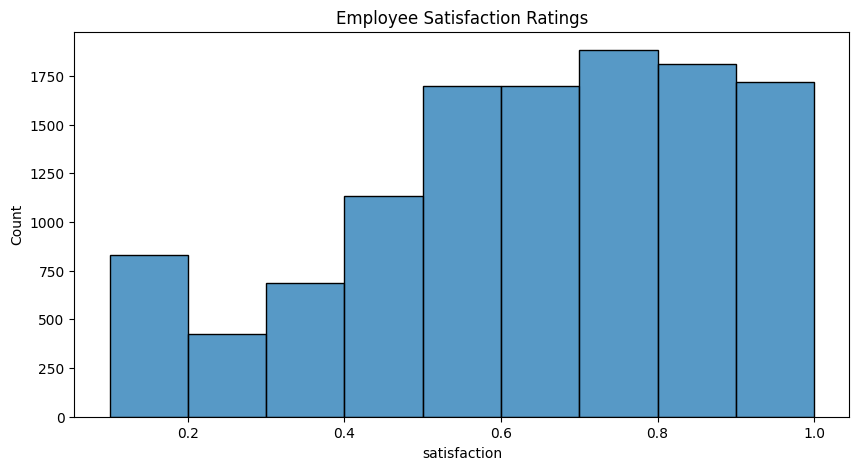

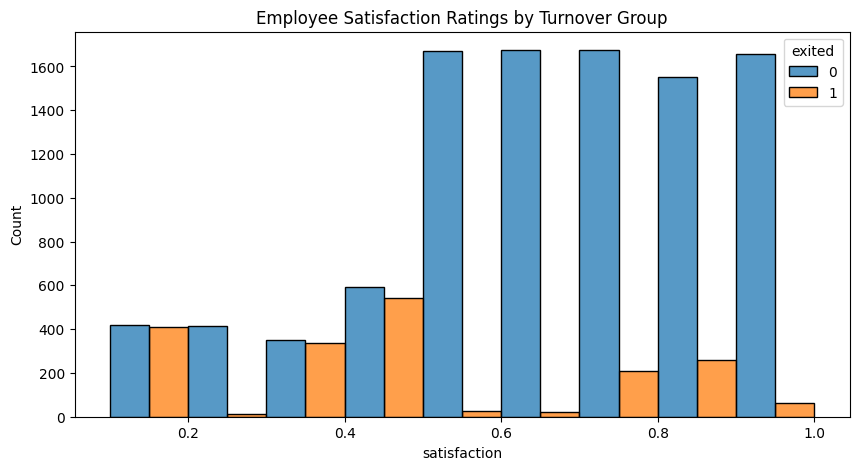

In [109]:
# Boxplot of Employee Satisfaction Ratings
plt.figure(figsize=(10,2))
plt.title('Employee Satisfaction Ratings')
sns.boxplot(data=None, x=df1['satisfaction'], fliersize=1);

# Histogram of Employee Satisfaction Ratings
plt.figure(figsize=(10,5))
sns.histplot(df1['satisfaction'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title('Employee Satisfaction Ratings');

# Histogram of Employee Satisfaction Ratings by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['satisfaction'],hue=df1['exited'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], multiple='dodge')
plt.title('Employee Satisfaction Ratings by Turnover Group');


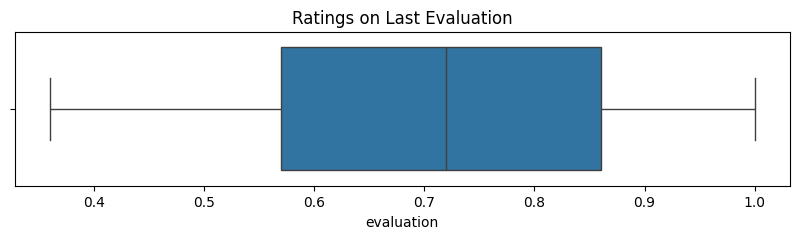

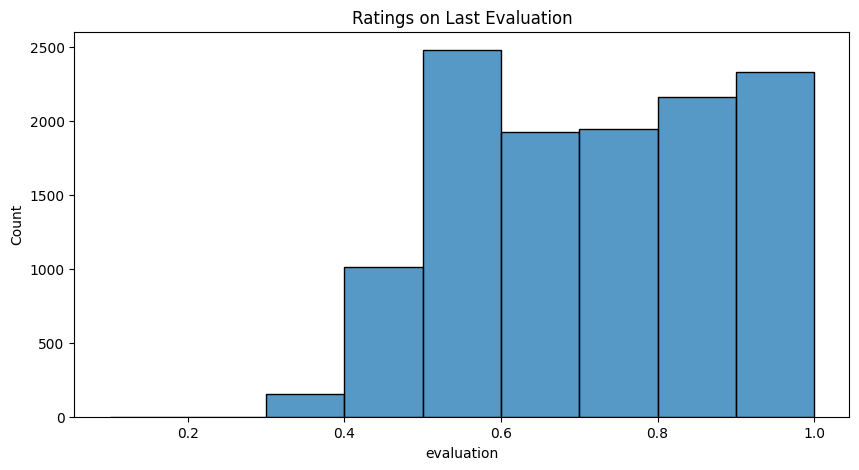

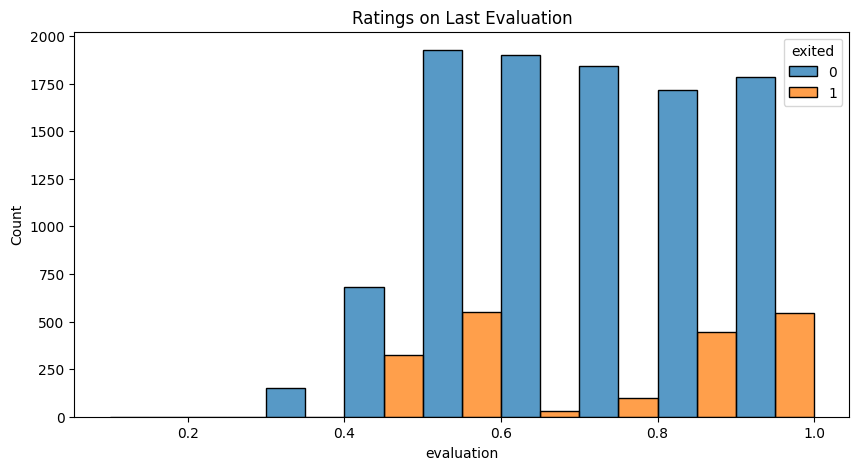

In [110]:
# Boxplot of Evaluation Ratings
plt.figure(figsize=(10,2))
plt.title('Ratings on Last Evaluation')
sns.boxplot(data=None, x=df1['evaluation'], fliersize=1);

# Histogram of Evaluation Ratings
plt.figure(figsize=(10,5))
sns.histplot(df1['evaluation'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title('Ratings on Last Evaluation');

# Histogram of Evaluation Ratings by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['evaluation'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], hue=df1['exited'],multiple='dodge')
plt.title('Ratings on Last Evaluation');

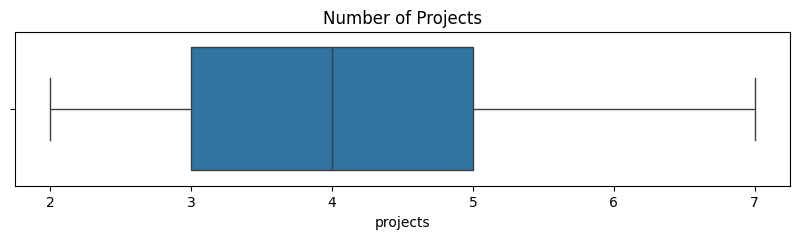

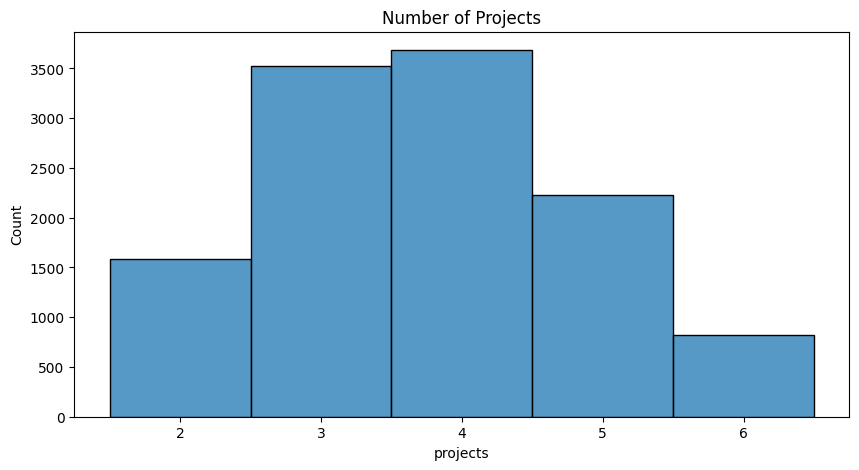

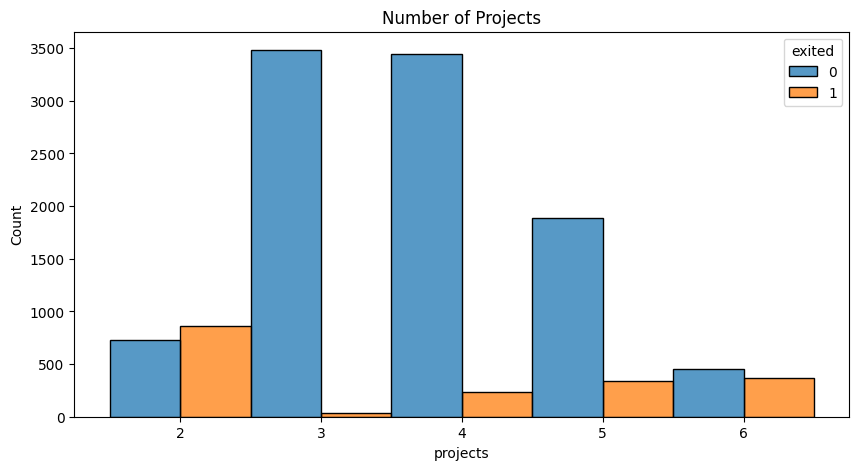

In [111]:
# Boxplot of Number of Projects
plt.figure(figsize=(10,2))
plt.title('Number of Projects')
sns.boxplot(data=None, x=df1['projects'], fliersize=1);

# Histogram of Number of Projects
plt.figure(figsize=(10,5))
sns.histplot(df1['projects'], bins=np.arange(min(df1['projects'])-0.5, max(df1['projects'])+0.5))
plt.title('Number of Projects');

# Histogram of Number of Projects by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['projects'], bins=np.arange(min(df1['projects'])-0.5, max(df1['projects'])+0.5), hue=df1['exited'],
            multiple='dodge')
plt.title('Number of Projects');

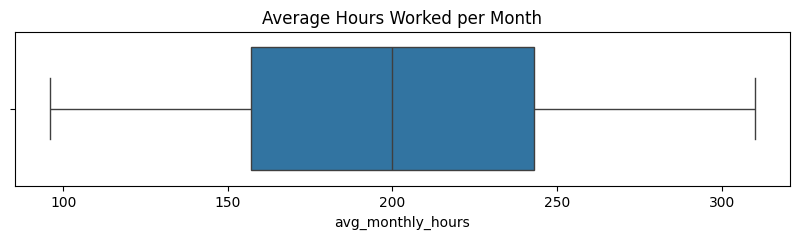

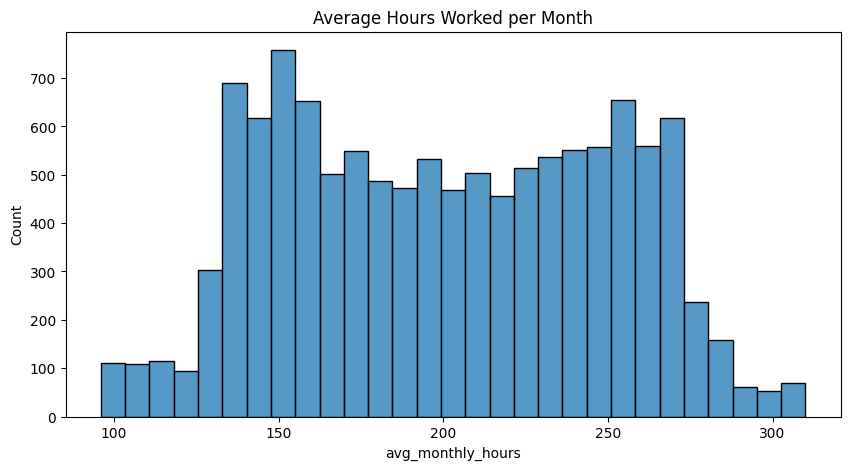

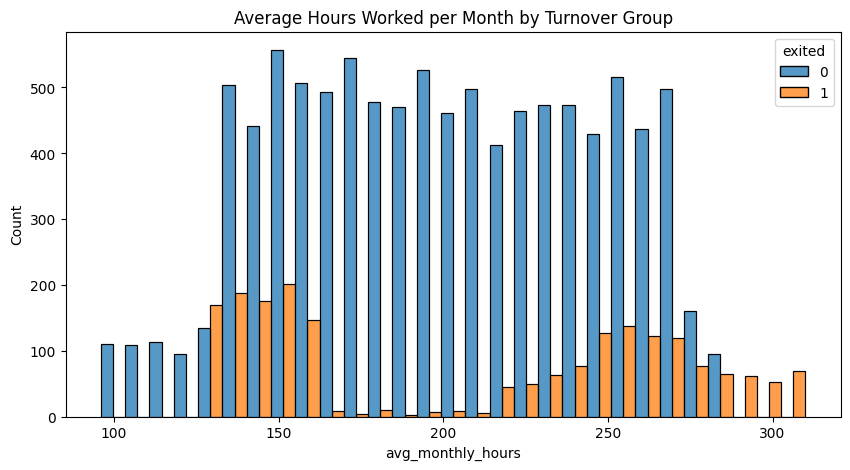

In [112]:
# Barplot of Average Hours Worked per Month
plt.figure(figsize=(10,2))
plt.title('Average Hours Worked per Month')
sns.boxplot(data=None, x=df1['avg_monthly_hours'], fliersize=1);

# Histogram of Average Hours Worked per Month
plt.figure(figsize=(10,5))
sns.histplot(df1['avg_monthly_hours'])
plt.title('Average Hours Worked per Month');

# Histogram of Average Hours Worked per Month by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['avg_monthly_hours'], hue=df1['exited'], multiple='dodge')
plt.title('Average Hours Worked per Month by Turnover Group');

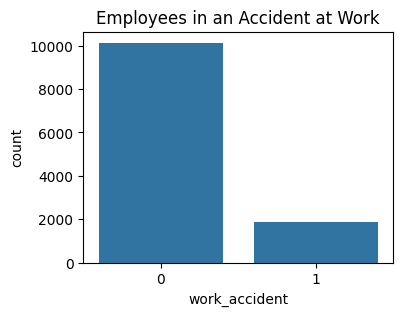

In [113]:
# Create a plot for work_accident
plt.figure(figsize=(4,3))
sns.countplot(x='work_accident', data=df1, color= '#1f77b4')
plt.title('Employees in an Accident at Work');

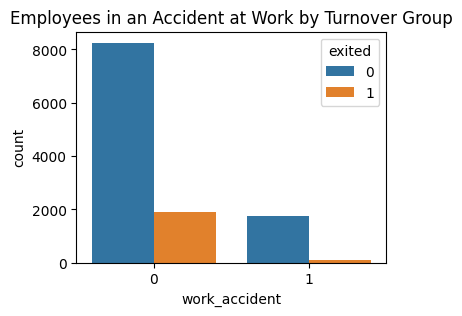

In [114]:
# Create a plot for work_accident by turnover group
plt.figure(figsize=(4,3))
sns.countplot(x='work_accident', hue='exited', data=df1)
plt.title('Employees in an Accident at Work by Turnover Group');

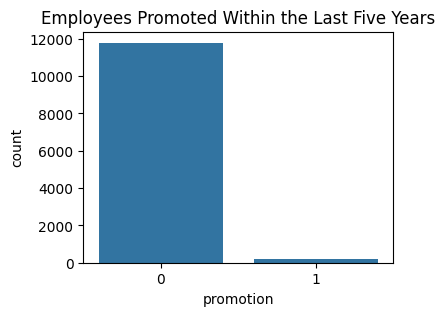

In [115]:
# Create a plot for promotion
plt.figure(figsize=(4,3))
sns.countplot(x='promotion', color = '#1f77b4', data=df1)
plt.title('Employees Promoted Within the Last Five Years');

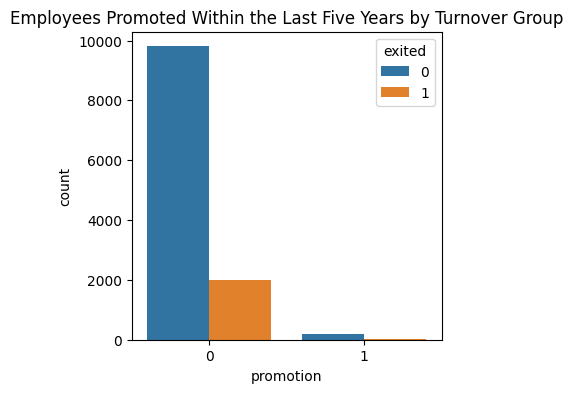

In [116]:
# Create a plot for promotion by turnover group
plt.figure(figsize=(4,4))
sns.countplot(x='promotion', hue='exited', data=df1)
plt.title('Employees Promoted Within the Last Five Years by Turnover Group');

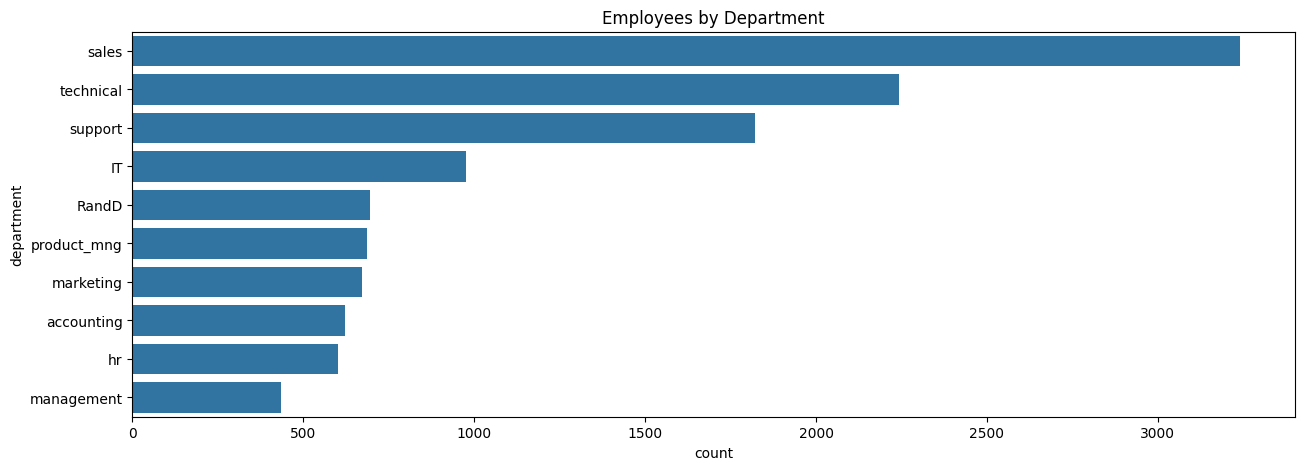

In [117]:
# Create a plot for department
plt.figure(figsize=(15,5))
sns.countplot(df1['department'], color = '#1f77b4',order=df1['department'].value_counts().index)
plt.title('Employees by Department');


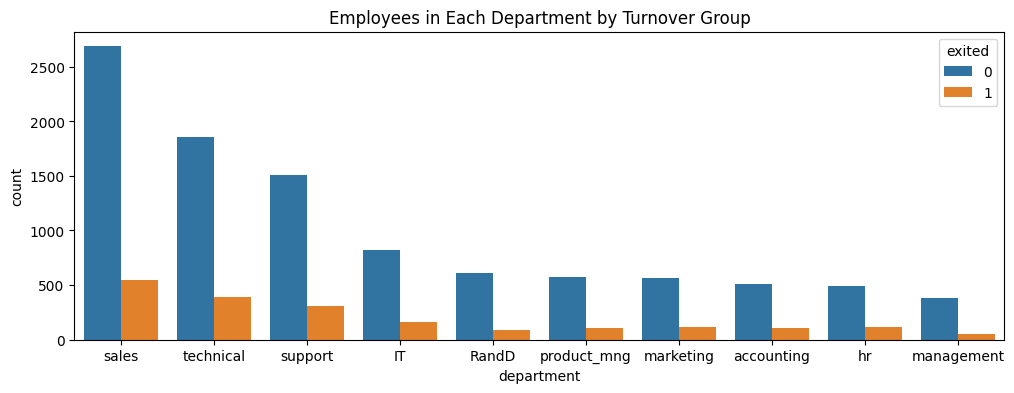

In [118]:
# Create a plot for department by turnover group
plt.figure(figsize=(12,4))
sns.countplot(x=df1['department'], hue='exited', order=df1['department'].value_counts().index, data=df1)
plt.title('Employees in Each Department by Turnover Group');

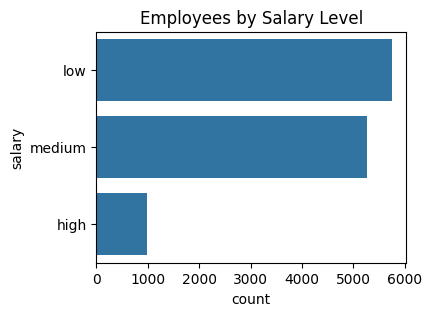

In [119]:
# Create a plot for salary level
plt.figure(figsize=(4,3))
sns.countplot(df1['salary'], color = '#1f77b4')
plt.title('Employees by Salary Level');

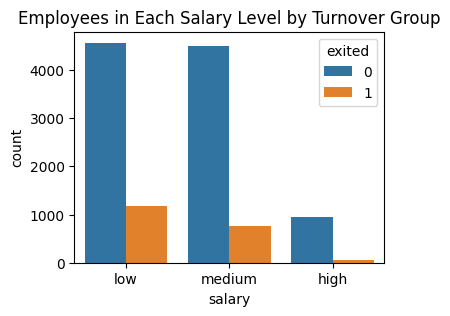

In [120]:
# Create a plot for salary level by turnover
plt.figure(figsize=(4,3))
sns.countplot(x='salary', data=df1, hue='exited')
plt.title('Employees in Each Salary Level by Turnover Group');

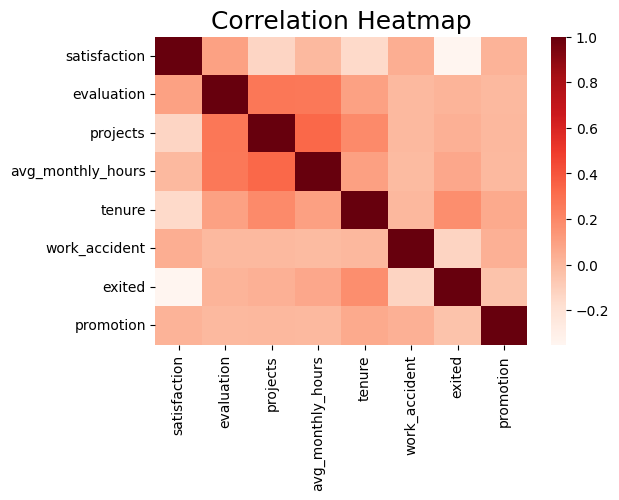

In [121]:
# Create correlation heatmap
dtype_df = df1.dtypes
float_cols = dtype_df.iloc[(dtype_df=='float64').values].index
int_cols = dtype_df.iloc[(dtype_df=='int64').values].index
numeric_cols = float_cols.append(int_cols)

plt.figure(figsize=(6,4))
sns.heatmap(df1[numeric_cols].corr(method='pearson'), cmap='Reds')
plt.title('Correlation Heatmap',
          fontsize=18)
plt.show()

*None of the predictor variables are very highly correlated with one another.*

*Calculating VIF will give us another clue about whether multicollinearity is an issue. VIF values above 10 indicate there is a multicollinearity issue. (VIF can only be used on continuous data.)*

In [122]:
# Calculate the variance inflation factor.

# Create a subset of the data with the continous independent variables. 
X = df1[['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
satisfaction,6.712350
evaluation,18.751671
projects,13.528789
avg_monthly_hours,17.886233
tenure,7.077480
work_accident,1.181744
promotion,1.022509


*The highest VIF value is for `evaluation` (18.751671), so we will recalculate VIF values after removing it.*

In [123]:
# Calculate the variance inflation factor.

# Create a subset of the data with the continous independent variables. 
X = df1[['satisfaction','projects','avg_monthly_hours','tenure','work_accident','promotion']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
satisfaction,5.808563
projects,12.067447
avg_monthly_hours,15.202340
tenure,6.774364
work_accident,1.181468
promotion,1.022268


*After recalculating VIF values, `avg_monthly_hours` has the highest VIF (15.202340), so we will recalculate VIF values after removing it.*

In [124]:
# Calculate the variance inflation factor.

# Create a subset of the data with the continous independent variables. 
X = df1[['satisfaction','projects','tenure','work_accident','promotion']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
satisfaction,4.738892
projects,7.627216
tenure,6.198361
work_accident,1.181069
promotion,1.022029


*Now that we have removed `evaluation` and `avg_monthly_hours`, all of the VIF values are below 10, so we will move forward with these variables.*

*The next step is to convert the categorical variables into numerical variables.*

In [125]:
# Create numeric `salary_code` column

# Create a replacement dictionary
salary_code_dict = {'low':0, 'medium':1, 'high':2}

# Populate the `salary_code` column
df1['salary_code'] = df1.loc[:,'salary'].replace(salary_code_dict)

df1.head()

C:\Users\smith\AppData\Local\Temp\ipykernel_14812\1672027522.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary_code'] = df1.loc[:,'salary'].replace(salary_code_dict)


,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [126]:
# Convert `department` to numeric data

# Create dummy variables with department values
dummies = pd.get_dummies(df1['department'],dtype='int')

# Combine `df1` DataFrame with new dummy department columns
df1 = pd.concat([df1, dummies], axis = 1)

# Display the first few rows of `df1`
df1.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0


### Insights

* *Very few employees at Salifort Motors have been promoted in the last 5 years. Employees feeling like they can't grow their careers at their current company can lead them to pursue career opportunities elsewhere.*
* *Few employees have salaries in the high range. Most have low or medium salaries. The company may want to review their compensation model to ensure they are providing competitive and fair salaries.*
* *The largest department by number of employees is Sales, followed by technical and support departments.*
* *The majority of employees have been at the company between 2 and 5 years.*

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





***Decision Trees***
* *Require no assumption regarding distribution of data*
* *Handle collinearity very easily*
* *Can be susceptible to overfitting*
* *Can be easier to understand than random forests*

***Random Forests***
* *Help reduce the high variance you may get from a single decision tree*
* *Have less bias and lower variance than a standalone decision tree*
* *Can be more of a 'black box' compared to a single decision tree*


### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
    - *The fact that there is no missing data would be unusual for a real-life data set.*
    - *The average monthly hours variable has a bimodal distribution (two peaks) for the turnover group. It would be useful to analyze the difference between those with high and low monthly hours. It would be useful to compare this with voluntary vs. involuntary turnover, but this dataset lacks that information.*
    - *In a real-life scenario, we would probably have data indicating which employee turnover events were voluntary and which where involuntary.*
- Which independent variables did you choose for the model and why?
    - *For the Logistic Regression, I chose all numerical varibles except `evaluation` and `avg_monthly_hours`, due to their high VIF values. I also transformed the `satisfaction` variable.*
    - *For the first random forest model, I chose all numerical variables. In the second random forest model, the `satisfaction` variable was removed to make the model more realistic.*
- Are each of the assumptions met?
    * *Assumptions are met for Random Forest model.*
    * *Logistic Regression Assumptions:*
        * *The outcome variable is categorical*
        * *Each observation is an individual employee, so each observation is independent from the others*
        * *No severe multicollinearity. This assumption is met after removing the `evaluation` and `avg_monthly_hours` variables.*
        * *No severe outliers. This assumption is met after removing outliers from the `tenure` variable.*
        * *A linear relationship exists between each X variable and the logit of the outcome variable (tested using Box-Tidwell)*
            * *This assumption has been violated for `satisfaction`. To remedy this, the variable can be transformed or dropped.*
        * *Sufficient sample size. This assumption has been met.*
            * *I used the formula N = 10 k / p , where k is the number of predictors and p is the proportion of positive cases in the population.*
            * *Our sample size is 11991, and we are using 80% of that (9592 observations) as training data to build the model. The proportion of positive cases in the population is 0.166.*
            * *9592 = 10 * k / 0.166* 
            * *k = 159 is the maximum number of predictors. We have well under this number.*
- How well does your model fit the data?
    * *The logistic regression model fits the data reasonably well overall, but is poor at predicting turnover.*
    * *The first random forest model fits the data very well, but maybe too well. It is possible that there is a problem with data leakage or overfitting.*
    * *The second random forest model removes the `satisfaction` score, since it is unlikely that this data would exist for all employees in a real-life scenario, and is a potential source of data leakage. This model still performs well, but is probably more realistic than the first random forest model.*
* *Logistic Regression Model Performance Metrics:*
    * *Accuracy: 0.818711*
    * *Precision: 0.390625*
    * *Recall: 0.206612*
    * *F1 Score: 0.270270*
    * *AUC: 0.572039*
* *Random Forest Model 1 Performance Metrics:*
    * *Accuracy: 0.985*
    * *Precision: 0.987*
    * *Recall: 0.995*
    * *F1 Score: 0.991*
    * *AUC: 0.962*
* *Random Forest Model 2 Performance Metrics:*
    * *Accuracy: 0.976*
    * *Precision: 0.981*
    * *Recall: 0.990*
    * *F1 Score: 0.986*
    * *AUC: 0.943*
- Can you improve it? Is there anything you would change about the model?
    * *The first random forest model was improved by removing `satisfaction` to make it more realistic.*
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    * *I find myself referring to example code used in previous courses, as well as the following online resources:*
        * *To check the  a linear relationship between each continuous X variable and the logit of the probability that Y equals 1, I used the Box-Tidwell test:*
            * *https://github.com/sandipanpaul21/Logistic-regression-in-python/blob/main/07_LR_Assumptions.ipynb*
        * *Instructions on using a polynomial to transform the `satisfied` column due to its violation of the log linear relationship:* 
            * *https://blog.quantinsti.com/polynomial-regression-adding-non-linearity-to-a-linear-model/*
        * *Instructions on using multinomial logistic regression:*
            * *https://library.virginia.edu/data/articles/logistic-regression-four-ways-with-python*
        * *Instructions on determining sufficient sample size:*
            * *https://stats.stackexchange.com/questions/26016/sample-size-for-logistic-regression*
        * *Instructions on calculating Variance Inflation Factor (VIF):*
            * *https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b*
        * *Information about data separation:*
            * *https://www.statisticssolutions.com/data-separation/*
- Do you have any ethical considerations in this stage?
    - *I have no ethical considerations at this time, however, the Salifort HR department and leadership teams should uphold the same ethical standards for this model that they would use for any HR function.*

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

*This is a classification task.*

### Identify the types of models most appropriate for this task.

*Logistic regression and tree-based models are the most appropriate for this task.*

### Modeling

Add as many cells as you need to conduct the modeling process.

#### *Approach 1: Logistic Regression Model*

In [127]:
# Remove extreme outliers

# Isolate outliers
reverse_mask = ((df1['tenure'] >= lower_limit) & (upper_limit >= df1['tenure']))
print("Number of outliers on tenure: ",len(df1[mask]))
print("Number of non-outliers on tenure: ",len(df1[reverse_mask]))
print("Outliers + non-outliers = ", (len(df1[reverse_mask]) + len(df1[mask])))

# Create a dataframe without outliers for Logistic Regression
df2 = df1[reverse_mask] 
print(len(df2))

Number of outliers on tenure:  824
Number of non-outliers on tenure:  11167
Outliers + non-outliers =  11991
11167


In [128]:
# Box Tidwell test to check for a linear relationship between each X variable and the logit of the outcome variable

# Box Tidwell only works for positive values. Hence, drop values where x = 0.
# We will do this in a new dataframe (lt for logit transform)
df2_lt = df2.drop(df2[df2.satisfaction == 0].index)
df2_lt = df2_lt.drop(df2_lt[df2_lt.avg_monthly_hours == 0].index)
df2_lt = df2.drop(df2_lt[df2_lt.tenure == 0].index)

# Logistic Regression with statsmodel 
# Inclusion of interaction term (logit transform) as part of Box-Tidwell test

# Define continuous variables
continuous_var = ['satisfaction', 'avg_monthly_hours', 'tenure']

# Add logit transform interaction terms (natural log) for continuous variables e.g. Age * Log(Age)
for var in continuous_var:
    df2_lt[f'{var}:Log_{var}'] = df2_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df2_lt.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,satisfaction:Log_satisfaction,avg_monthly_hours:Log_avg_monthly_hours,tenure:Log_tenure
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,-0.367682,793.830591,3.295837
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,-0.242800,1524.778162,5.545177
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,-0.236523,1205.799305,8.047190
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,-0.367873,805.955768,3.295837
5,0.41,0.50,2,153,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,-0.365555,769.657002,3.295837


In [129]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + df2_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

['satisfaction',
 'avg_monthly_hours',
 'tenure',
 'satisfaction:Log_satisfaction',
 'avg_monthly_hours:Log_avg_monthly_hours',
 'tenure:Log_tenure']

In [130]:
# Redefine independent variables to include interaction terms
X_lt = df2_lt[cols_to_keep]
y_lt = df2_lt['exited']

# Add constant
X_lt = sma.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())    

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 exited   No. Observations:                11167
Model:                            GLM   Df Residuals:                    11160
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3742.4
Date:                Mon, 12 Feb 2024   Deviance:                       7484.7
Time:                        13:08:14   Pearson chi2:                 8.17e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2109
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

*Results of Box-Tidwell Test*
* *The p value for satisfaction:Log_satisfaction is not < 0.05, meaning that it is not statistically significant. For the `satisfaction` variable, the assumption has been violated.*
* *The p values for avg_monthly_hours:Log_avg_monthly_hours and tenure:Log_tenure are < 0.05, meaning they are statistically significant. The assumption has not been violated for these variables.*
* *The `satisfaction` variable should be transformed or dropped.*

In [131]:
# Transforming the `satisfaction` variable

# Create the `satisfaction_squared` column
df2['satisfaction_squared']=df1['satisfaction']**2
df2.head()

C:\Users\smith\AppData\Local\Temp\ipykernel_14812\1914012855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['satisfaction_squared']=df1['satisfaction']**2


,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,satisfaction_squared
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1444
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0.0121
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.5184
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1369
5,0.41,0.50,2,153,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1681


In [132]:
# Repeat the Box Tidwell test with our transformed variable

# Box Tidwell only works for positive values. Hence, drop values where x = 0.
# We will do this in a new dataframe (lt for logit transform)
df2_lt = df2.drop(df2[df2.satisfaction_squared == 0].index)
df2_lt = df2_lt.drop(df2_lt[df2_lt.avg_monthly_hours == 0].index)
df2_lt = df2.drop(df2_lt[df2_lt.tenure == 0].index)

# Logistic Regression with statsmodel 
# Inclusion of interaction term (logit transform) as part of Box-Tidwell test

# Define continuous variables
continuous_var = ['satisfaction_squared', 'avg_monthly_hours', 'tenure']

# Add logit transform interaction terms (natural log) for continuous variables e.g. Age * Log(Age)
for var in continuous_var:
    df2_lt[f'{var}:Log_{var}'] = df2_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df2_lt.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,satisfaction_squared,satisfaction_squared:Log_satisfaction_squared,avg_monthly_hours:Log_avg_monthly_hours,tenure:Log_tenure
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1444,-0.279438,793.830591,3.295837
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0.0121,-0.053416,1524.778162,5.545177
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.5184,-0.340593,1205.799305,8.047190
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1369,-0.272226,805.955768,3.295837
5,0.41,0.50,2,153,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1681,-0.299755,769.657002,3.295837


In [133]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + df2_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

['satisfaction_squared',
 'avg_monthly_hours',
 'tenure',
 'satisfaction_squared:Log_satisfaction_squared',
 'avg_monthly_hours:Log_avg_monthly_hours',
 'tenure:Log_tenure']

In [134]:
# Redefine independent variables to include interaction terms
X_lt = df2_lt[cols_to_keep]
y_lt = df2_lt['exited']

# Add constant
X_lt = sma.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())    

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 exited   No. Observations:                11167
Model:                            GLM   Df Residuals:                    11160
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3739.7
Date:                Mon, 12 Feb 2024   Deviance:                       7479.5
Time:                        13:08:14   Pearson chi2:                 8.17e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2113
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

*Results of Box-Tidwell Test:*
* *After transforming the `satisfaction` variable by squaring it, the assumption of logit linearity is met.*

*Creating a new dataframe for the Logistic Regression model*

In [135]:
# Creating a new dataframe for construction of the Logistic Regression model

df3 = df2.copy()

df3 = df3.drop(['satisfaction','department','salary','sales'], axis=1)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluation            11167 non-null  float64
 1   projects              11167 non-null  int64  
 2   avg_monthly_hours     11167 non-null  int64  
 3   tenure                11167 non-null  int64  
 4   work_accident         11167 non-null  int64  
 5   exited                11167 non-null  int64  
 6   promotion             11167 non-null  int64  
 7   salary_code           11167 non-null  int64  
 8   IT                    11167 non-null  int32  
 9   RandD                 11167 non-null  int32  
 10  accounting            11167 non-null  int32  
 11  hr                    11167 non-null  int32  
 12  management            11167 non-null  int32  
 13  marketing             11167 non-null  int32  
 14  product_mng           11167 non-null  int32  
 15  support               11

In [136]:
# Remove the target column from the features
X = df3.drop(columns='exited')

# Set y variable
y = df3[['exited']]

# Display first few rows
X.head()

,evaluation,projects,avg_monthly_hours,tenure,work_accident,promotion,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,satisfaction_squared
0,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,0,0,0.1444
2,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,0,0,0.0121
3,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,0,0,0.5184
4,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,0,0,0.1369
5,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,0,0,0.1681


In [137]:
y.head()

,exited
0,1
2,1
3,1
4,1
5,1


In [138]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [139]:
# Create a logistic regression classifier model

# Create the formula string
all_columns = ' + '.join(X.columns)
formula = 'exited ~ ' + all_columns
print('Formula: ', formula, '\n')

Formula:  exited ~ evaluation + projects + avg_monthly_hours + tenure + work_accident + promotion + salary_code + IT + RandD + accounting + hr + management + marketing + product_mng + support + technical + satisfaction_squared 



In [140]:
# Put the training predictors and the responses into one DataFrame to be imput into the model
trainingdata = pd.concat([X_train,y_train], axis = 1)

# Build the model
log_reg_1 = sm.logit(formula = formula, data = trainingdata).fit()

log_reg_1.summary()

Optimization terminated successfully.
         Current function value: 0.323356
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 exited   No. Observations:                 8933
Model:                          Logit   Df Residuals:                     8915
Method:                           MLE   Df Model:                           17
Date:                Mon, 12 Feb 2024   Pseudo R-squ.:                  0.2908
Time:                        13:08:14   Log-Likelihood:                -2888.5
converged:                       True   LL-Null:                       -4073.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8217      0.190    -14.875      0.000      -3.193      -2.450
evaluation              -0.1046      0.227     -0.462      0.644      -0.549       0.339
projects                -0.3901      0.032    -12.069      0.000      -0.453      -0.327
avg_monthly_hours        0.0044      0.001      5.687      0.000       0.003       0.006
tenure                   1.1417      0.044     25.816      0.000       1.055       1.228
work_accident           -1.5373      0.135    -11.420      0.000      -1.801      -1.273
promotion               -1.2716      0.463     -2.744      0.006      -2.180      -0.363
salary_code             -0.5002      0.057     -8.808      0.000      -0.611      -0.389
IT                      -0.1423      0.136     -1.049      0.294      -0.408       0.124
RandD                   -0.4122      0.169     -2.437      0.015      -0.744      -0.081
accounting              -0.0480      0.152     -0.316      0.752      -0.346       0.250
hr                      -0.1086      0.158     -0.686      0.493      -0.419       0.202
management              -0.2093      0.210     -0.997      0.319      -0.621       0.202
marketing                0.0935      0.153      0.613      0.540      -0.205       0.392
product_mng             -0.1928      0.154     -1.249      0.212      -0.495       0.110
support                  0.0218      0.106      0.206      0.837      -0.186       0.230
technical                0.0422      0.099      0.428      0.669      -0.151       0.236
satisfaction_squared    -4.1730      0.152    -27.521      0.000      -4.470      -3.876
========================================================================================
"""

*The only department that has a statistically significant relationship to turnover is `RandD`. `avg_monthly_hours` has a low coefficient, meaning that it is not contributing strongly to the model.*

In [141]:
# Predict responses 
pred_1 = log_reg_1.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
y_pred_1 = list(map(round, pred_1))

In [142]:
# Model performance metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_1))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_1))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_1))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_1))
print("AUC Score:", "%.6f" % metrics.roc_auc_score(y_test,y_pred_1))

Accuracy: 0.818711
Precision: 0.390625
Recall: 0.206612
F1 Score: 0.270270
AUC Score: 0.572039


In [143]:
# Create a table of results
table = pd.DataFrame(columns=['model', 'precision', 'accuracy', 'recall', 'f1', 'auc']  )

table.loc[0] = ['logistic regression',
                metrics.precision_score(y_test, y_pred_1),
                metrics.accuracy_score(y_test, y_pred_1),
                metrics.recall_score(y_test, y_pred_1),
                metrics.f1_score(y_test, y_pred_1),
                metrics.roc_auc_score(y_test,y_pred_1)]  # adding a row
table

,model,precision,accuracy,recall,f1,auc
0,logistic regression,0.390625,0.818711,0.206612,0.27027,0.572039


While this has a relatively high accuracy, the precision, recall, and F1 scores are low.

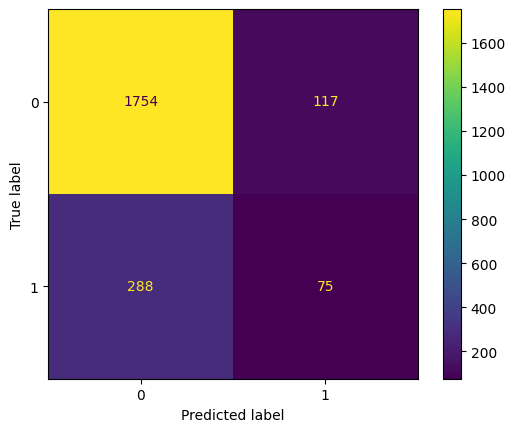

In [144]:
    # Produce a confusion matrix.
    labels = [0,1]
    cm = metrics.confusion_matrix(y_test, y_pred_1, labels = labels)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = labels)
    disp.plot(values_format = '')

In [145]:
# Create classification report for logistic regression model
target_names = ['predicted to NOT leave','predicted to leave']
print(classification_report(y_test, y_pred_1, target_names=target_names))

                        precision    recall  f1-score   support

predicted to NOT leave       0.86      0.94      0.90      1871
    predicted to leave       0.39      0.21      0.27       363

              accuracy                           0.82      2234
             macro avg       0.62      0.57      0.58      2234
          weighted avg       0.78      0.82      0.79      2234



*The weighted averages give us a precision value of 0.78, recall of 0.82, and f1 score of 0.79, so the model is strong overall.*

*However, when we look at the model's ability to predict employees who leave, the scores are quite a bit poorer, with a precision value of 0.39, recall of 0.21, and f1 score of 0.27.*

### Approach 2: Random Forest Model

In [146]:
# Creating a copy of df1, which is the original data with duplicates removed
df3 = df1

# Create numeric `salary_code` column

# Create a replacement dictionary
salary_code_dict = {'low':0, 'medium':1, 'high':2}

# Populate the `salary_code` column
df3['salary_code'] = df3.loc[:,'salary'].replace(salary_code_dict)

# Convert `department` to numeric data

# Create dummy variables with department values
dummies = pd.get_dummies(df3['department'],dtype='int')

# Combine `df1` DataFrame with new dummy department columns
df3 = pd.concat([df3, dummies], axis = 1)

# Display the first few rows of `df3`
df3.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [147]:
df4 = df3.drop(['department','salary'], axis=1)

In [148]:
# Separate the dataset into labels (y) and features (X).

y = df4['exited']
X = df4.drop('exited', axis=1)

In [149]:
# Separate into train, validate, test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [150]:
# Determine set of hyperparameters.

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [151]:
# Create list of split indices.

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [152]:
# Instantiate model.
rf = RandomForestClassifier(random_state=0)

In [153]:
# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs=-1, verbose=1)

In [154]:
%%time
# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


CPU times: total: 734 ms
Wall time: 6.11 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [155]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [156]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=50, max_features="sqrt", 
                                max_samples=0.5,min_samples_leaf=1, min_samples_split=0.001)

In [157]:
# Fit the optimal model.

rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.5, min_samples_split=0.001,
                       random_state=0)

In [158]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

In [159]:
# Get precision, recall, accuracy, and F1 scores

# Get precision score.
pc_test = precision_score(y_test, y_pred, pos_label=0)
print('Precision score: {pc:.3f}'.format(pc=pc_test))
# Get recall score.
rc_test = recall_score(y_test, y_pred, pos_label=0)
print('Recall score: {rc:.3f}'.format(rc=rc_test))
# Get accuracy score.
ac_test = accuracy_score(y_test, y_pred)
print('Accuracy score: {ac:.3f}'.format(ac=ac_test))
# Get F1 score.
f1_test = f1_score(y_test, y_pred, pos_label=0)
print('F1 score: {f1:.3f}'.format(f1=f1_test))

auc_test = roc_auc_score(y_test, y_pred)
print('AUC score: {auc:.3f}'.format(auc=auc_test))

Precision score: 0.987
Recall score: 0.995
Accuracy score: 0.985
F1 score: 0.991
AUC score: 0.962


In [160]:
table.loc[1] = ['random forest',
                pc_test,
                ac_test,
                rc_test,
                f1_test,
                auc_test ]  # adding a row
table

,model,precision,accuracy,recall,f1,auc
0,logistic regression,0.390625,0.818711,0.206612,0.270270,0.572039
1,random forest,0.986656,0.984656,0.995249,0.990934,0.961608


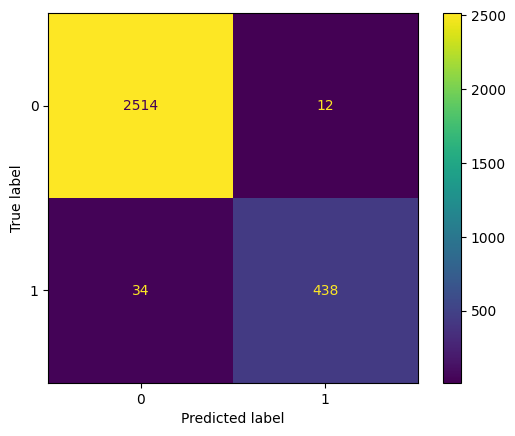

In [162]:
    # Produce a confusion matrix.
    labels = [0,1]
    cm = metrics.confusion_matrix(y_test, y_pred, labels = labels)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = labels)
    disp.plot(values_format = '')

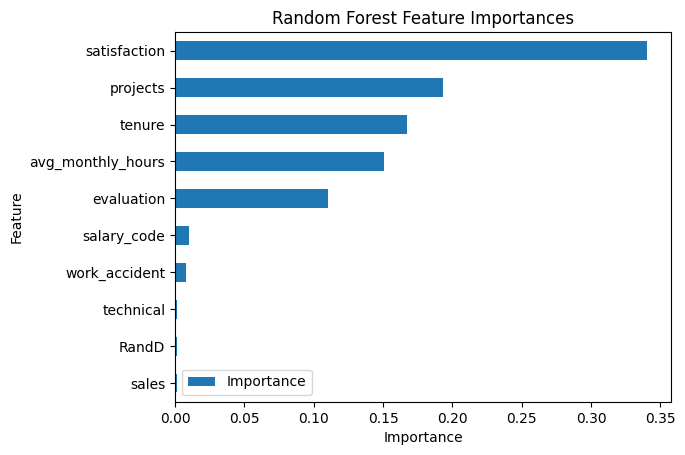

In [164]:
# Get feature importances
importances = rf_opt.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_opt.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
importances = importances[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":importances})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest Feature Importances")
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()


### Approach 3: Random Forest Model without Satisfaction

In [165]:
# Creating a copy of df3, which is the dataset used for the first Random Forest Model,
# and dropping 'satisfaction'
df5 = df3.drop(['department','salary','satisfaction'], axis=1)

In [166]:
# Display the first few rows of `df5`
df5.head()

,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [167]:
# Separate the dataset into labels (y) and features (X).

y = df5['exited']
X = df5.drop('exited', axis=1)

In [168]:
# Separate into train, validate, test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [169]:
# Determine set of hyperparameters.

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [170]:
# Create list of split indices.

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [171]:
# Instantiate model.
rf = RandomForestClassifier(random_state=0)

In [172]:
# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs=-1, verbose=1)

In [173]:
%%time
# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: total: 406 ms
Wall time: 2.06 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [174]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [175]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=50, max_features="sqrt", 
                                max_samples=0.5,min_samples_leaf=1, min_samples_split=0.001)

In [176]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.5, min_samples_split=0.001,
                       random_state=0)

In [177]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

In [178]:
# Get precision, recall, accuracy, and F1 scores

# Get precision score.
pc_test = precision_score(y_test, y_pred, pos_label=0)
print('Precision score: {pc:.3f}'.format(pc=pc_test))
# Get recall score.
rc_test = recall_score(y_test, y_pred, pos_label=0)
print('Recall score: {rc:.3f}'.format(rc=rc_test))
# Get accuracy score.
ac_test = accuracy_score(y_test, y_pred)
print('Accuracy score: {ac:.3f}'.format(ac=ac_test))
# Get F1 score.
f1_test = f1_score(y_test, y_pred, pos_label=0)
print('F1 score: {f1:.3f}'.format(f1=f1_test))
auc_test = roc_auc_score(y_test, y_pred)
print('AUC score: {auc:.3f}'.format(auc=auc_test))

Precision score: 0.981
Recall score: 0.990
Accuracy score: 0.976
F1 score: 0.986
AUC score: 0.943


In [179]:
table.loc[2] = ['random forest',
                pc_test,
                ac_test,
                rc_test,
                f1_test,
                auc_test ]  # adding a row
table

,model,precision,accuracy,recall,f1,auc
0,logistic regression,0.390625,0.818711,0.206612,0.270270,0.572039
1,random forest,0.986656,0.984656,0.995249,0.990934,0.961608
2,random forest,0.980792,0.975650,0.990499,0.985621,0.943343


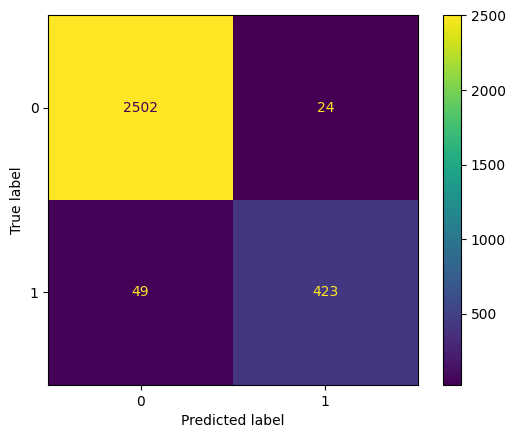

In [180]:
    # Produce a confusion matrix.
    labels = [0,1]
    cm = metrics.confusion_matrix(y_test, y_pred, labels = labels)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = labels)
    disp.plot(values_format = '')

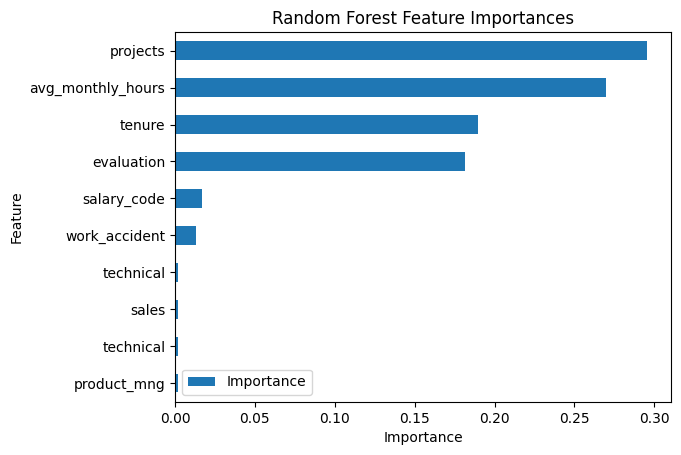

In [181]:
# Get feature importances
importances = rf_opt.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_opt.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
importances = importances[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":importances})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest Feature Importances")
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- Do you have any ethical considerations in this stage?


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression

*The weighted averages give us an accuracy score of 0.82, a precision value of 0.78, recall of 0.82, and f1 score of 0.79 (weighted averages), so the model is strong overall.*

*However, when we look specifically at the model's ability to predict employees who leave, the scores are much poorer, with a precision value of 0.39, recall of 0.21, and f1 score of 0.27.*

Random Forest Model

*The random forest model had a precision score of 0.987, a recall score of 0.995, a F1 score of 0.991, and an AUC score of 0.962. This model performs better than the Logistic Regression model. However, such high scores may indicate that there is an issue with data leakage. It is unlikely that a company will have satisfaction scores for all of their employees, since not all employees fill out satisfaction surveys.* 

*For a more realistic model, I created a random forest model without the satisfaction data. This random forest model had a precision score of 0.981, a recall score of 0.990, a F1 score of 0.986, and an AUC score of 0.943. This is still a highly performing model, but it is more realistic than the original random forest model.*


### Conclusion, Recommendations, Next Steps

*The Random Forest Model outperformed the Logistic Regression Model, particularly when we are trying to predict employees who leave the organization. However, there may be issues with data leakage with the Satisfaction factor. Because Satisfaction is the factor with the highest importance, and given that it is unlikely for a company to have satisfaction scores for 100% of their employees, I would recommend creating a more realistic model by removing Satisfaction scores.*

*Number of Projects and Monthly Hours Worked were also shown to be important factors in predicting employee turnover. I would recommend that the company pay attention to how many hours employees are logging monthly and how many projects are assigned to each employee. If employees are working much more than expected hours, they should have some of their projects taken off their workload. It may also be useful to analyze the number of projects that is associated with full-time hours and set that as a cap for number of projects assigned to a single employee.* 

*The exploratory data analysis also showed a bimodal distribution for both number of projects and average hours worked, meaning that people who leave the company tend to work either high or low numbers of hours and have few or very many projects, with a dip in the middle. It may be the case that some employees who leave are not being given enough responsibility to grow in their career, or it may be that these are underperforming employees who will be let go due to performance issues. To investigate this further, I would recommend getting data about which employees left voluntarily compared to those who left involuntarily.*